<a href="https://colab.research.google.com/github/uirom/practice/blob/main/Part4_titanic_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/gdrive/')

Mounted at /gdrive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 개별로 파일 하나씩 마운트 하는 방법
# from google.colab import files
# file_uploaded = files.upload()

In [ ]:
# from google.colab import files
# file_uploaded = files.upload()

In [ ]:
# from google.colab import files
# file_uploaded = files.upload()

In [ ]:
drive_path = pd.read_csv("/content/titanic.csv")
train = pd.read_csv(drive_path+)
test = pd.read_csv("/content/titanic.csv")
submission = pd.read_csv("/content/titanic.csv")
print(train.shape, test.shape, submission.shape)

(891, 12) (891, 12) (891, 12)


In [ ]:
train.head(3)  #train 데이터프레임 내용 확인

In [ ]:
test.head(2)  #test 데이터프레임 내용 확인

In [ ]:
submission.head()  #submission 제출 파일 양식

In [ ]:
train.info()  #train 데이터프레임 개요 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe(include='all')  #train 데이터 프레임 통계 정보 인클루드에 all 지정하면 문자열 정보 포함해서 보여줌
   #아래에서 위로갈수록 빈도가 많은 값

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


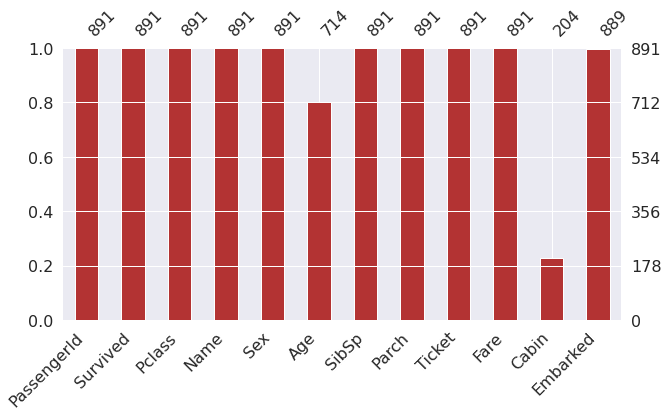

In [ ]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

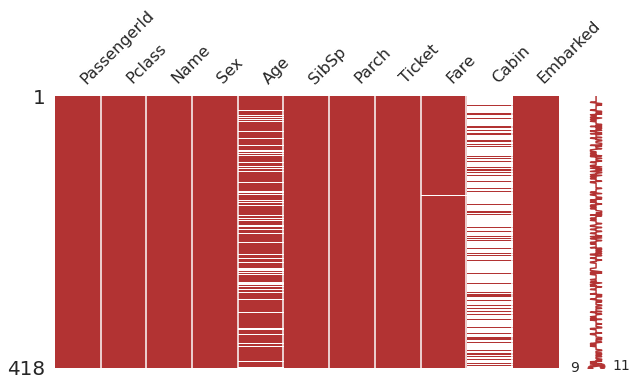

In [ ]:
#매트릭스 함수 사용하면 결측값 어디있는지 보다 쉽게 찾기 가능
msno.matrix(test, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

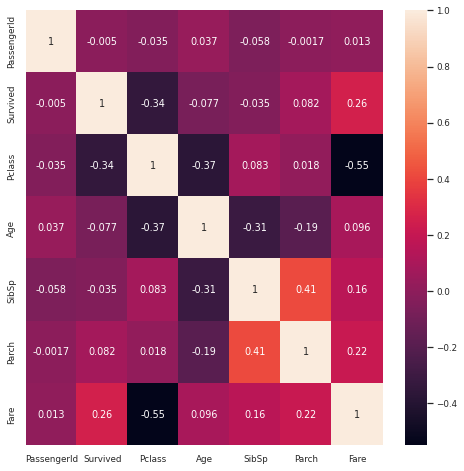

In [ ]:
# 숫자형 변수 간의 상관관계를 계산하여 히트맵 그리기
# corr함수는 숫자형 데이터로 구성된 열에 대해서만 상관계수 계산함
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True);
plt.show()
# 상관계수 높은 건 숫자가 큰것과 낮은것

In [ ]:
# 타이타닉 전체 데이터셋 준비
train['TrainSplit']='Train'
test['TrainSplit']='Test'
data=pd.concat([train, test], axis=0)  #concat 결합함수. 데이터 프레임을 위아래방향(axis=0)으로 연결
print(data.shape)

(1309, 13)


In [ ]:
#숫자형 피처 추출
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

#결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

#학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)


Train 데이터셋 크기: (891, 5) (891,)
Test 데이터셋 크기: (418, 5)


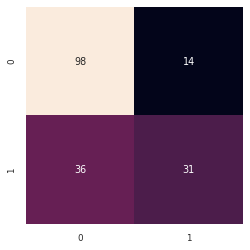

In [ ]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)
y_val_pred = lr_model.predict(X_val)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()
# 98-FN, 14-TN, 31-FP, 36-TP

In [ ]:
# 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%4f" % precision_score(y_val, y_val_pred))
print("Recall:%4f" % recall_score(y_val, y_val_pred))
print("F1:%4f" % f1_score(y_val, y_val_pred))
print("AUC:%4f" % roc_auc_score(y_val, y_val_pred))
# AUC의 최댓값은 1이며, 예측력 좋은 모델일수록 1에 가까운 값 가진다. (데이콘 경진대회에서 사용하는 평가 지표)

Accuracy:0.720670
Precision:0.688889
Recall:0.462687
F1:0.553571
AUC:0.668843


In [ ]:
# test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

# 제출 양식에 맞게 정리
submission['survived'] = y_test_pred.astype(int)

# 제출파일 저장
submission_filepath = '/gdrive/MyDrive/titanic' + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head(5)

,PassengerId,Survived,survived
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,0


In [ ]:
# 타깃 레이블의 분포 확인
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

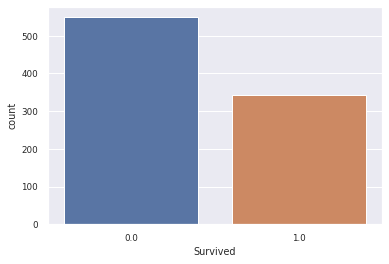

In [ ]:
 # 객실 등급별 분포 확인
 sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
 plt.show()

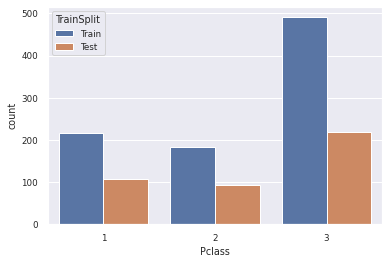

In [ ]:
# train - test 데이터 분포
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()
#. => 3등석 승객 가장 많은것 확인 가능.

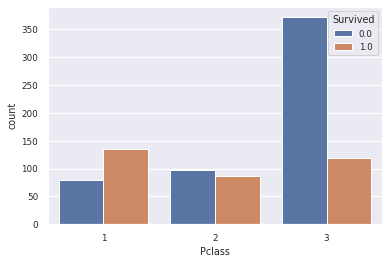

In [ ]:
# pclass별 survived 여부
sns.countplot(x='Pclass', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()
#  => 객실 등급에 따른 생존율 차이

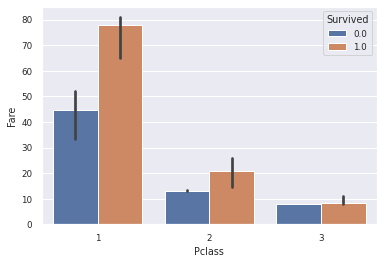

In [ ]:
# Pclass변 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y="Fare", hue='Survived',
            data=data[data['TrainSplit']=='Train'], estimator=np.median)  #median 중간값, mean =평균
plt.show()
#  => 생존 여부로 구분한 객실 등급별 객실 요금 분포. (생존자 비율이 높은 1,2등석.  생존자들이 지불한객실 요금이 높은 패턴을 보임)

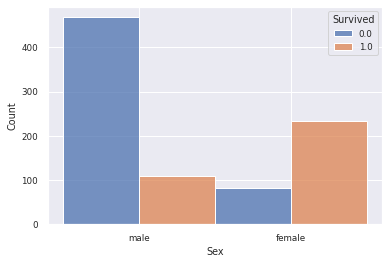

In [ ]:
# hisplot 함수 - dodge 옵션
sns.histplot(x='Sex', hue='Survived',multiple='dodge', data=data[data['TrainSplit']=='Train'])
plt.show()
#  => 상대적으로 남성보다 여성의 생존율이 더 높다 확인 가능.
#     (multiple의 설정은 3가지:dodge, stack, fill. 이중 dodge로 보는 표현이 가장 정확한 값 찾기 가능)
#  => 이때 miltiple 속성 없애도 값보기 가능. stack과 비슷한 그림으로 확인 완료

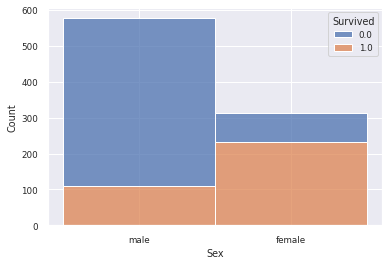

In [ ]:
sns.histplot(x='Sex', hue='Survived',multiple='stack', data=data[data['TrainSplit']=='Train'])
plt.show()

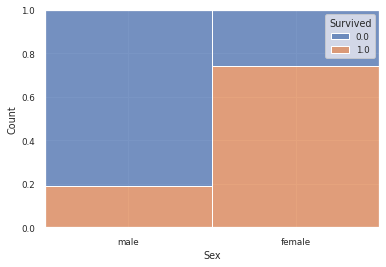

In [ ]:
sns.histplot(x='Sex', hue='Survived',multiple='fill', data=data[data['TrainSplit']=='Train'])
plt.show()
#  => hue의 속성을 상대적 백분율로 표시.

In [ ]:
# 레이블 인코딩(female:0, male:1) =>문자열 사용하지 않고 숫자형 데이터로 변환
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex']= data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [ ]:
data['Name'].unique()
# => name 열은 문자열로만 구성되어 있음.

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [ ]:
title_name = data['Name'].str.split(",",expand=True)[1]
title_name
#  => name열을 선택하고 str속성을 적용하면 쉼표 기준으로 부활. [남/여 mr,ms 추출]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [ ]:
title = title_name.str.split(".",expand=True)[0]
title.value_counts(dropna=False)
#  =>[성 family name 추출]

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [ ]:
# 값이 안나옴 오류해결 => regex=True 써주면 됨
# 비슷한 속성 가진 타이틀 그룹으로 묶기. replace이용하여 리스트안 문자열들을 뒤로오게 바꿈
title = title.replace(['Ms'], 'Miss', regex=True)
title = title.replace(['Mlle','the Countess','Lady','Don','Dona','Mme','Sir','Jonkheer'], 'Noble', regex=True)
title = title.replace(['col','Major','capt'], 'officer', regex=True)
title = title.replace(['Dr','Rev'], 'Priest', regex=True)
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Col          4
 officer      2
 Capt         1
 Noblea       1
Name: Title, dtype: int64

In [ ]:
# replace(['Miss', 'Mrs', 'Ms','Mlle','Lady', 'Dona', 'the countess'], 'Miss/Mrs/Ms', inplace=True, regex=True)

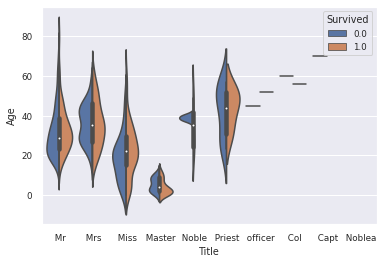

In [ ]:
# 승객 나이와 생존여부와의 관계
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [ ]:
# name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [ ]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
  # 결측값 개수 확인
  print("%s 결측값 개수:"% title, data.loc[data['Title']==title, 'Age']. isnull().sum())
  # 각 title의 중간값으로 대체
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)
# fillna 비어있는 값에 특정한 값채우기 가능. 컬럼별 다른값 넣기 가능. 딕셔너리 형태로 들어감. 비어있지 않다면 채우기 불가능

  print("\n")
  print("Age 열의 결측값 개수:", data['Age'].isnull().sum())

 Mr 결측값 개수: 176


Age 열의 결측값 개수: 87
 Mrs 결측값 개수: 27


Age 열의 결측값 개수: 60
 Miss 결측값 개수: 51


Age 열의 결측값 개수: 9
 Master 결측값 개수: 8


Age 열의 결측값 개수: 1
 Noble 결측값 개수: 0


Age 열의 결측값 개수: 1
 Priest 결측값 개수: 1


Age 열의 결측값 개수: 0
 officer 결측값 개수: 0


Age 열의 결측값 개수: 0
 Col 결측값 개수: 0


Age 열의 결측값 개수: 0
 Capt 결측값 개수: 0


Age 열의 결측값 개수: 0
 Noblea 결측값 개수: 0


Age 열의 결측값 개수: 0


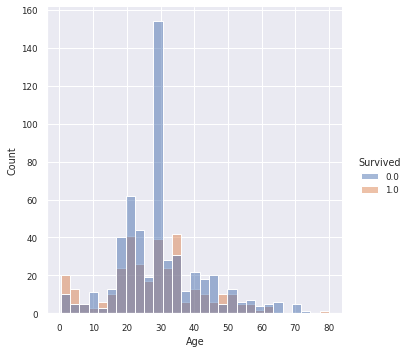

In [ ]:
# age 분포
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

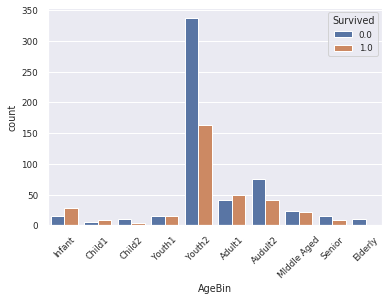

In [ ]:
# Binning - 구간 나누기
bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Audult2',
          'MIddle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin(나이 구간)에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

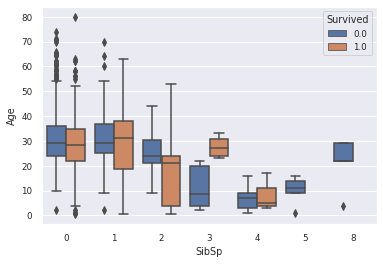

In [ ]:
# 형제자매/ 배우자 수와 승객나이 및 생존율 관계
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()
# => 동승자가 2~3명일 경우 나이에 따른 생존 여부에 차이 있음 확인

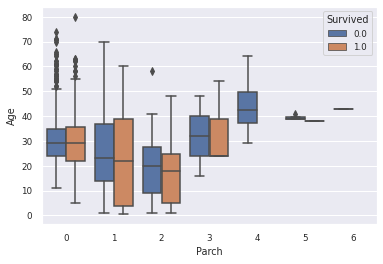

In [ ]:
# 부모/자식 수에 따른 승객나이 및 생존율 관계
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()
# => 동승자가 4명 이상일 경우엔 생존자가 거의없음

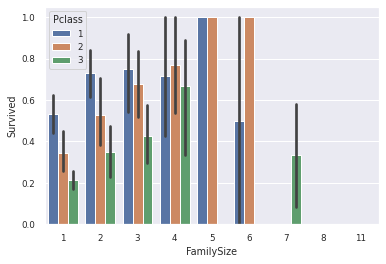

In [ ]:
# 가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 가족 구성원의 수와 생존율 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()
# = >가족 수에 따라 객실등급에 따른 생존율에 차이 있음을 확인

In [ ]:
# fare 데이터의 결측값 확인
data.loc[data['Fare'].isnull(),:]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [ ]:
# 3등성 요금의 평균값으로 결측값 채워줌
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
print(p3_fare_mean)
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

13.302888700564973


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


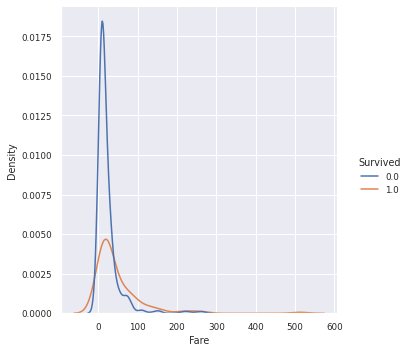

In [ ]:
# Fare 분포
sns.displot(x='Fare', kind='kde', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()
#  => fare열의 데이터는 연속적인 값 가짐. 왼쪽으로 치우친 비대칭 분포를 보임

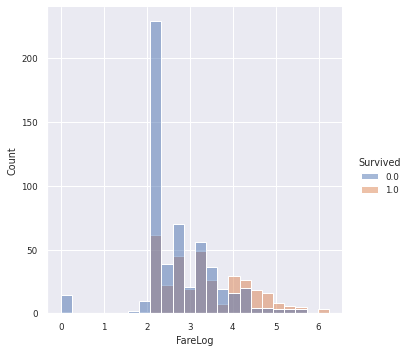

In [ ]:
# 비대칭분포 정규화 하기 위해 로그변환 이용
# log 변환
data['FareLog'] = np.log1p(data['Fare'])

# farelog  분포
sns.displot(x='FareLog', kind='hist', hue='Survived',
            data=data[data['TrainSplit']=='Train'])
plt.show()
#  => 정규분포와 가까운 형태로 변환됨을 확인. 단, 요금 낮은 쪽으로 데이터 비어있는 구간 있다는 사실도 확인 가능

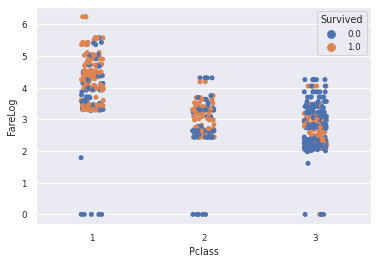

In [ ]:
# 객실 등급별 객실 요금 분포와 생존율
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()
#  stripplot함수로 객실등급에 따른 요금분포, hue로 생존자 분포 비교
#.    => 객실 등급과 요금간의 관계

In [ ]:
# 결측값 확인
data.loc[data['Embarked'].isnull(),:]
#  => 결측값 2개 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Audult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [ ]:
# 최빈값을 사용하여 결측값 처리
# 가장 탑승자가 많은 항구인 'S'값으로 결측값을 채움. 최빈값은 mode 함수로 구한다.
print("Embarked 열의 최빈값:", data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Embarked 열의 최빈값: S


S    916
C    270
Q    123
Name: Embarked, dtype: int64

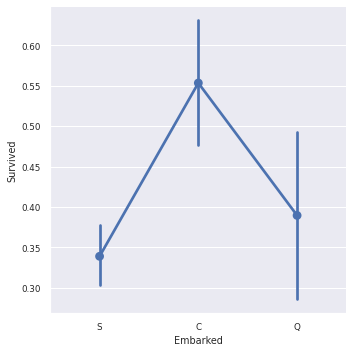

In [ ]:
# 탑승 항구별 생존율 비교
sns.catplot(x='Embarked', y='Survived', kind='point', data=data[data['TrainSplit']=='Train'])
plt.show()
# kind 옵션을 point로 설정하면 클래스별 중심과 분산 비교 가능. C항구 탑승자의 생존율이 높은 편

In [ ]:
# 고유값 확인 cabin 열은 객실구역 나타내는 알파벳과 숫자로 이루어져 있음
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# 첫번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)
#  => 결측값이 1014개로 많은 편. 이런 경우엔 보통 열 전체 삭제하지만, 여기선 삭제X, 유의미한 속성인지 확인

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

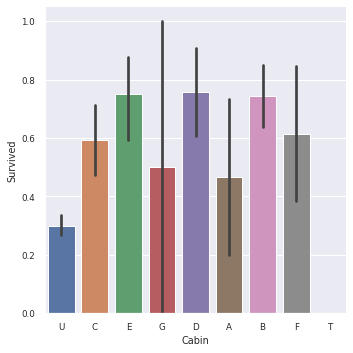

In [ ]:
# 알파벳 이니셜로 대체. 결측값은 'U'로 입력
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna('U')

# cabin 구역별 생존율 비교
sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

In [ ]:
# 고유값 확인
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
# 오류! 이거때문에 아래 값이 안나오는 것 같은 느낌
# 문자열 정리 - 알파벳 부분만 따로 추출해서 정리
# regex = True는 원래 코딩값엔 없는 것. 오류메세지 확인 부탁
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split('').str[0]
data['Ticket'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


    1309
Name: Ticket, dtype: int64

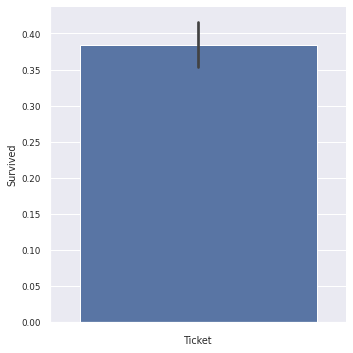

In [ ]:
# 문자열이 숫자인 경우 "NUM"으로 대체
data.loc[data['Ticket'].str.isdigit(),'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)[:10]

# Ticket 번호별 생존율 비교
sns.catplot(x='Ticket', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Label Encording
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:,['Title', 'AgeBin']].head()

KeyError: ignored

In [ ]:
# 범주형 변수로 변환 및 원핫 인코딩
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
  data[col] = data[col].astype('category')
  data = pd.get_dummies(data, columns = [col], prefix=col[:3], drop_first=True)
  onehot_prefix.append(col[:3])

data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]].head()
 # drop_first = false로 했을때: 그 전에 값이 잘 나오다가 False로 바뀌고 오류

,Emb_Q,Emb_S,Cab_A11,Cab_A14,Cab_A16,Cab_A18,Cab_A19,Cab_A20,Cab_A21,Cab_A23,...,Tic_W./C. 14258,Tic_W./C. 14260,Tic_W./C. 14263,Tic_W./C. 14266,Tic_W./C. 6607,Tic_W./C. 6608,Tic_W./C. 6609,Tic_W.E.P. 5734,Tic_W/C 14208,Tic_WE/P 5735
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 스케일링 처리할 피처 선택 - TrainSplit 등 일부 열 제외
scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col!='TrainSplit']

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
data.loc[:, scaled_cols] = data_scaled[:, :]
data.head()

ValueError: ignored

In [ ]:
# 모델학습에 사용할 피처 선책하고, selected_features에 저장. 모두 54개
selected_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'Agebin', 'FamilySize', 'FareLog',
                     'Emb_Q', 'Emb_s', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G', 'Cab_T',
                     'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS', 'Tic_C', 'Tic_CA', 'Tic_CASOTON',
                     'Tic_FC', 'Tic_FCC','Tic_Fa', 'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
                     'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS', 'Tic_SCParis', 'Tic_SOC',
                     'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2', 'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
                     'Tic_SWPP', 'Tic_WC', 'Tic_WEP']

len(selected_features)

54

In [ ]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features]
X_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

KeyError: ignored

In [ ]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)
print("훈련 데이터셋 크기:", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기:", X_val.shape, y_val.shape)

In [ ]:
# 로지스틱 회귀 모델
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

y_tr_pred = lr_model.predict(X_tr)
print("훈련 Accuracy:%.4f"% accuracy_score(y_tr, y_tr_pred))
print("훈련 AUC:%.4f"% roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(X_val)
print("검증 Accuracy:%.4f"% accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f"% roc_auc_score(y_val, y_val_pred))
# 훈련Accuracy보다 검증Accuracy가 더 큼. 과소적합 상태

훈련 Accuracy:0.7037
훈련 AUC:0.6568
검증 Accuracy:0.7207
검증 AUC:0.6688


In [ ]:
# 해결 : 경로 안되는 것 해결. 경로 복사 누르기.
# test 데이터 예측 및 제출 파일 저장
y_test_pred = lr_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = '/content/drive/MyDrive/titanic/' + 'baseline_lr_submission_001.csv'
submission.to_csv(submission_filepath, index=False)


In [ ]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2020)

#cross_val_score 함수
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC점수:", np.round(auc_scores, 4))
print("평균 AUC의 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC점수: [0.6296 0.7019 0.7396 0.7752 0.7884]
평균 AUC의 점수: 0.7269


In [ ]:
# 제출 파일
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = '/content/drive/MyDrive/titanic' + 'baseline_rf_submission_001.csv'
submission.to_csv(submission_filepath, index=False)

In [ ]:
# tree 계열 알고리즘의 feature importance 그래프
def plot_importance(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  fature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize=(10,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)),feature_imp, align='center')
  plt.yticks(range(len(indices)), feature_names)
  plt.xlabel('Relative Importance')

  print('피처:', list(reversed(feature_names)))
  print('중요도:', list(reversed(feature_imp)))

  return list(reversed(feature_names)), list(reversed(feature_imp))


NameError: ignored

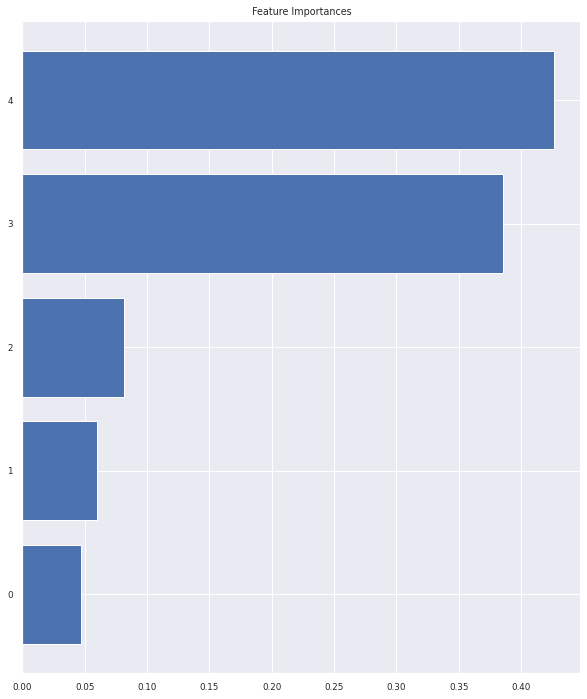

In [ ]:
# 랜덤 포레스트 모델의 피처 중요도
imp_features, imp_scores = plot_importance(rf_model, selected_features)

# 새 섹션